In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [27]:
# Creating a dataset with study hours (X) and result (Y)
data = {
    'Study Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Pass/Fail': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)
print(df)

   Study Hours  Pass/Fail
0            1          0
1            2          0
2            3          0
3            4          0
4            5          1
5            6          1
6            7          1
7            8          1
8            9          1
9           10          1


In [28]:
X = df[['Study Hours']]  # Features
y = df['Pass/Fail']  # Target variable

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 100.00%
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


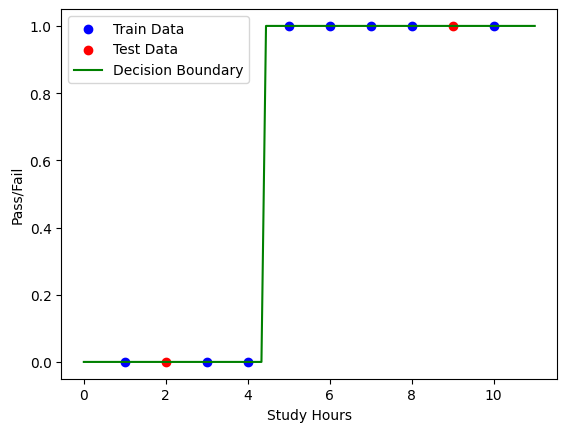

In [31]:
# Plotting the decision boundary
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')

# Create a range of values for X axis to plot the decision boundary
x_min, x_max = X['Study Hours'].min() - 1, X['Study Hours'].max() + 1
xx = np.linspace(x_min, x_max, 100).reshape(-1, 1)

# Plot the decision boundary
y_decision_boundary = model.predict(xx)
plt.plot(xx, y_decision_boundary, color='green', label='Decision Boundary')

plt.xlabel('Study Hours')
plt.ylabel('Pass/Fail')
plt.legend()
plt.show()